 1. Read the dataset
 2. Exploratory Data Analysis
 Initial Inspection
 Visualization
 3. Preprocess the Data
 Missing Values
 Feature Scaling
 Label Encoding
 Feature Selection / Feature Extraction
 4. Split into Train and Test
 5. Build the Model
 6. Train the Data / Learn from Data
 7. Test and Evaluate the Model
 8. Use the model for predicting future

In [37]:
import pandas as pd
df=pd.read_csv('Cloth_dataset.csv')
df.head()

,Weight(kg),Height(cm),Age,Brand,Item,Size
0,62.647338,172.965584,41.100000,Adidas,Jeans,M
1,65.894257,165.558003,28.400000,H&M,T-Shirt,M
2,65.231850,162.911701,28.500000,Uniqlo,Jeans,M
3,50.215818,154.888046,29.700000,Zara,Shirt,S
4,94.857616,182.285858,27.790304,Zara,Jacket,XXL


In [38]:
df.Item.value_counts()

Item
Jeans      380
Jacket     353
Dress      320
T-Shirt    308
Shirt      300
Name: count, dtype: int64

In [39]:
df.Size.value_counts()

Size
M       390
L       301
S       291
XXL     205
XS      205
XL      132
XXXL    114
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Weight(kg)  1680 non-null   float64
 1   Height(cm)  1686 non-null   float64
 2   Age         1644 non-null   float64
 3   Brand       1647 non-null   object 
 4   Item        1661 non-null   object 
 5   Size        1638 non-null   object 
dtypes: float64(3), object(3)
memory usage: 80.5+ KB


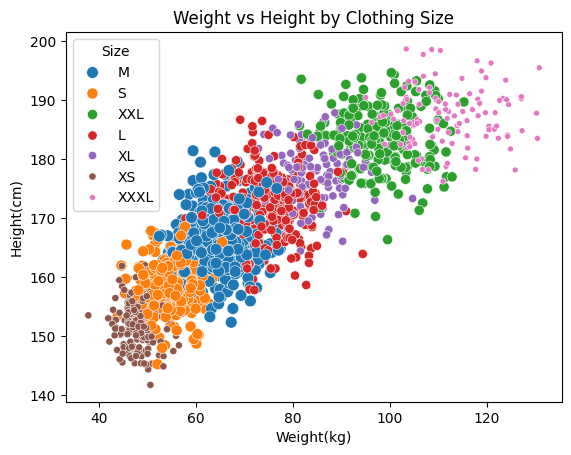

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Feature-Target Relationships

sns.scatterplot(x='Weight(kg)',y='Height(cm)',hue='Size',size='Size',data=df)
plt.title('Weight vs Height by Clothing Size')
plt.show()

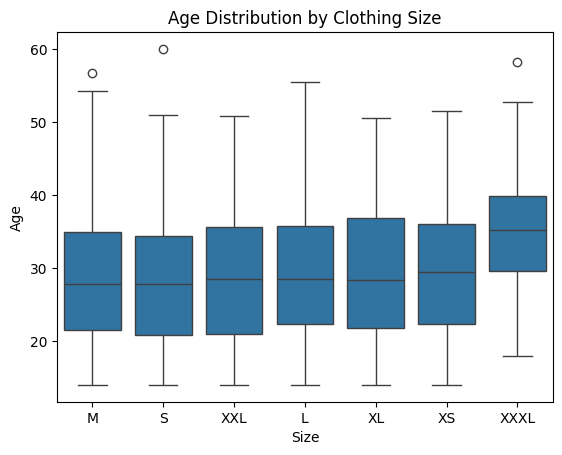

In [42]:
sns.boxplot(x='Size', y='Age', data=df)
plt.title('Age Distribution by Clothing Size')
plt.show()

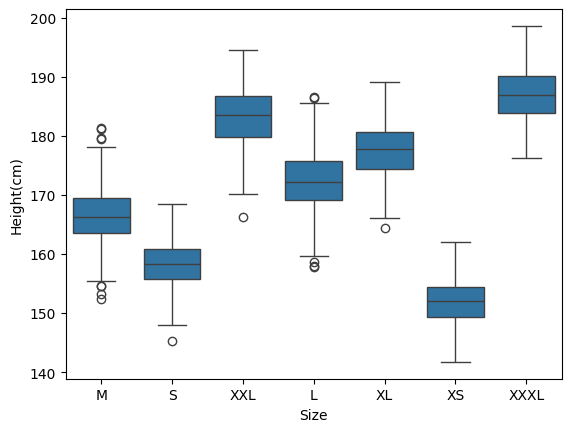

In [43]:
sns.boxplot(x='Size',y='Height(cm)',data=df)
plt.show()

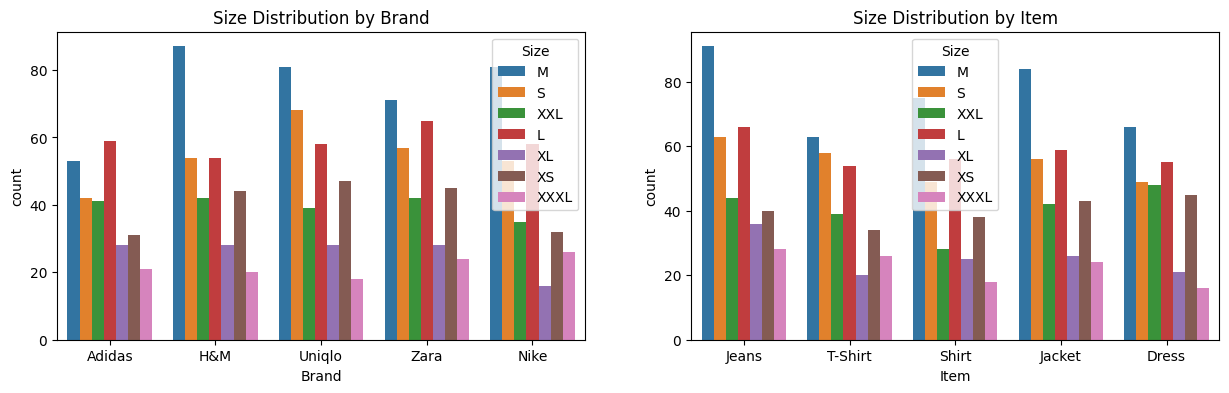

In [44]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Brand', hue='Size', data=df)
plt.title('Size Distribution by Brand')

plt.subplot(1, 2, 2)
sns.countplot(x='Item', hue='Size', data=df)
plt.title('Size Distribution by Item')

plt.show()

Size Distribution:
 Size
M       390
L       301
S       291
XXL     205
XS      205
XL      132
XXXL    114
Name: count, dtype: int64


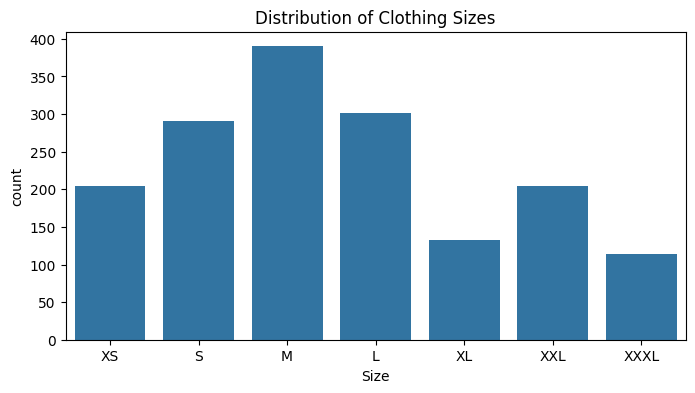

In [45]:
# Class Balance Analysis
size_dist = df['Size'].value_counts()
print("Size Distribution:\n", size_dist)
plt.figure(figsize=(8, 4))
sns.countplot(x='Size', data=df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL'])
plt.title('Distribution of Clothing Sizes')
plt.show()

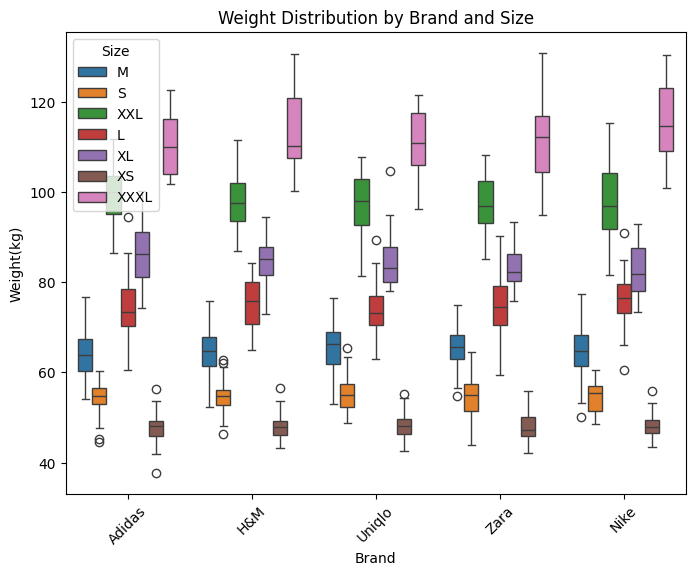

In [46]:
# Brand-Specific Sizing Patterns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Brand', y='Weight(kg)', hue='Size', data=df)
plt.title('Weight Distribution by Brand and Size')
plt.xticks(rotation=45)
plt.show()

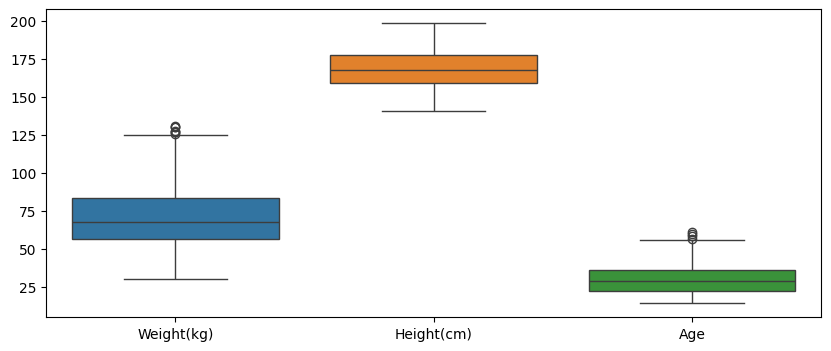

In [47]:
# Outlier Detection

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Weight(kg)', 'Height(cm)', 'Age']])
plt.show()

Handling Missing Value

In [48]:
print(df.isna().sum())
print(df.shape)

Weight(kg)    35
Height(cm)    29
Age           71
Brand         68
Item          54
Size          77
dtype: int64
(1715, 6)


In [49]:
numeric_cols=df[['Weight(kg)','Height(cm)','Age']]
cat_cols=df[['Brand','Item','Size']]

In [50]:
# Filling
for cat in cat_cols:
    df[cat]=df[cat].fillna(df[cat].mode()[0])

for num in numeric_cols:
    df[num]=df[num].fillna(df[num].mean())

df.isna().sum()

Weight(kg)    0
Height(cm)    0
Age           0
Brand         0
Item          0
Size          0
dtype: int64

In [51]:
df.shape

(1715, 6)

In [52]:
# Removal of Outliers


In [53]:
df.columns

Index(['Weight(kg)', 'Height(cm)', 'Age', 'Brand', 'Item', 'Size'], dtype='object')

In [54]:
numeric_cols=[ 'Weight(kg)', 'Height(cm)', 'Age']
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
outliers=df[((df[numeric_cols] < lowerbound) | (df[numeric_cols] > upperbound)).any(axis=1)]
df.drop(outliers.index, inplace=True)


Label Encoding

In [55]:
df.isna().sum()

Weight(kg)    0
Height(cm)    0
Age           0
Brand         0
Item          0
Size          0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
df['Brand'] = le_brand.fit_transform(df['Brand'])
le_item = LabelEncoder()
df['Item'] = le_item.fit_transform(df['Item'])
df.head()

,Weight(kg),Height(cm),Age,Brand,Item,Size
0,62.647338,172.965584,41.100000,0,2,M
1,65.894257,165.558003,28.400000,1,4,M
2,65.231850,162.911701,28.500000,3,2,M
3,50.215818,154.888046,29.700000,4,3,S
4,94.857616,182.285858,27.790304,4,1,XXL


In [57]:
mapping={'XS':0, 'S':1, 'M':2,'L':3,'XL':4,'XXL':5,'XXXL':6}
df['Size']=df['Size'].map(mapping)
df.head()

,Weight(kg),Height(cm),Age,Brand,Item,Size
0,62.647338,172.965584,41.100000,0,2,2
1,65.894257,165.558003,28.400000,1,4,2
2,65.231850,162.911701,28.500000,3,2,2
3,50.215818,154.888046,29.700000,4,3,1
4,94.857616,182.285858,27.790304,4,1,5


Feature Scaling

In [58]:
df.shape

(1697, 6)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Weight(kg)', 'Height(cm)', 'Age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Weight(kg),Height(cm),Age,Brand,Item,Size
0,-0.474444,0.388945,1.358146,0,2,2
1,-0.301928,-0.252083,-0.057015,1,4,2
2,-0.337123,-0.481085,-0.045872,3,2,2
3,-1.134957,-1.175426,0.087844,4,3,1
4,1.236958,1.195491,-0.124953,4,1,5


In [60]:
x=df.drop('Size',axis=1)
y=df.Size
y.value_counts()

Size
2    465
3    299
1    290
5    205
0    205
4    132
6    101
Name: count, dtype: int64

SOMTE Analysis

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,sampling_strategy='auto')
x, y = sm.fit_resample(x,y)
y.value_counts()

Size
2    465
1    465
5    465
3    465
4    465
0    465
6    465
Name: count, dtype: int64

Featuer Selection

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)  
x_selected = selector.fit_transform(x, y)  

In [63]:
# Train-Test Split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_selected, y, test_size=0.2, random_state=42, stratify=y)
print("Training shape:", xtrain.shape)
print("Testing shape:", xtest.shape)
ytrain.value_counts()

Training shape: (2604, 2)
Testing shape: (651, 2)


Size
2    372
6    372
4    372
5    372
3    372
1    372
0    372
Name: count, dtype: int64

Selecting the best Model

Logistic REG

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
print('LogisticRegression Training Accuracy',lr.score(xtrain,ytrain))
print('LogisticRegression Testing Accuracy',lr.score(xtest,ytest))

LogisticRegression Training Accuracy 0.7695852534562212
LogisticRegression Testing Accuracy 0.7726574500768049


Using navie

In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [67]:
print('Training Accuracy',nb.score(xtrain,ytrain))
print('Testing Accuracy',nb.score(xtest,ytest))


Training Accuracy 0.7745775729646698
Testing Accuracy 0.7803379416282642


Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [69]:
print('Training Accuracy',dt.score(xtrain,ytrain))
print('Testing Accuracy',dt.score(xtest,ytest))

Training Accuracy 1.0
Testing Accuracy 0.7480798771121352


Random Forest

In [70]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)
rf.fit(xtrain, ytrain)
print("Random Forest Training Accuracy:", rf.score(xtrain, ytrain))
print("Random Forest Testing Accuracy:", rf.score(xtest, ytest))

Random Forest Training Accuracy: 0.9043778801843319
Random Forest Testing Accuracy: 0.804915514592934


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.1, 1, 10, 50, 100, 500],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000],
}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(xtrain, ytrain)

print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print("Logistic Regression Train Accuracy:", lr_grid.best_estimator_.score(xtrain, ytrain))
print("Logistic Regression Test Accuracy:", lr_grid.best_estimator_.score(xtest, ytest))


Best Logistic Regression Parameters: {'C': 500, 'max_iter': 500, 'solver': 'lbfgs'}
Logistic Regression Train Accuracy: 0.7730414746543779
Logistic Regression Test Accuracy: 0.7772657450076805


SVM

In [72]:
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1, 1, 10, 50, 100, 500,1000],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced'],
    'probability': [True]
}

svm = SVC(random_state=42)

svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(xtrain, ytrain)

print("Best SVM Parameters:", svm_grid.best_params_)
print("SVM Train Accuracy:", svm_grid.best_estimator_.score(xtrain, ytrain))
print("SVM Test Accuracy:", svm_grid.best_estimator_.score(xtest, ytest))



Best SVM Parameters: {'C': 500, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
SVM Train Accuracy: 0.7956989247311828
SVM Test Accuracy: 0.804915514592934


In [73]:
# So SVM is best 

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_grid.predict(xtest)

print("Test Accuracy:", accuracy_score(ytest, y_pred))

print("\nClassification Report:")
print(classification_report(ytest, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred))


Test Accuracy: 0.804915514592934

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        93
           1       0.87      0.83      0.85        93
           2       0.77      0.68      0.72        93
           3       0.73      0.70      0.71        93
           4       0.74      0.83      0.78        93
           5       0.80      0.75      0.78        93
           6       0.86      0.95      0.90        93

    accuracy                           0.80       651
   macro avg       0.80      0.80      0.80       651
weighted avg       0.80      0.80      0.80       651


Confusion Matrix:
[[84  8  1  0  0  0  0]
 [11 77  5  0  0  0  0]
 [ 3  4 63 17  2  3  1]
 [ 0  0 13 65 15  0  0]
 [ 0  0  0  7 77  9  0]
 [ 0  0  0  0 10 70 13]
 [ 0  0  0  0  0  5 88]]


In [75]:
import joblib

# Save the final model
joblib.dump(svm_grid, 'model.pkl')  # RandomForestClassifier model

# Save the encoders used earlier
joblib.dump(le_brand, 'brand_encoder.pkl')  # LabelEncoder for Brand
joblib.dump(le_item, 'item_encoder.pkl')    # LabelEncoder for Item

# Save the scaler (important for input normalization in Flask)
joblib.dump(scaler, 'scaler.pkl')

# Save the feature selector if used (like SelectKBest)
joblib.dump(selector, 'selector.pkl')

print("✅ Model and all encoders saved successfully!")


✅ Model and all encoders saved successfully!
